# Car Emission Classification

New EPA requirements for gasoline cars (goal is 40 MPG), can a model predict the MPG rating just based on car specifications? 

## Importing

In [1]:
import numpy as np # linear algebra
import pandas as pd
import os
import random
from random import randint
random.seed(10)
import seaborn as sns
import matplotlib as plt

In [2]:
os. getcwd()

'C:\\Users\\User\\Documents\\Practice Code'

## Quick Data Cleaning

In [3]:
# Importing Data
data = pd.read_csv(r'Fuel_1.csv', sep=',', encoding='latin-1')
data

,Year,Make,Model,Veh Class,(L),Cyl,Trans,Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Cmb MPG,(g/km),CO2 Rating,Smog Rating
0,2023.0,Alfa Romeo,Giulia,Mid-size,2.0,4.0,A8,Z,10.0,7.2,8.7,32.0,205.0,5.0,5.0
1,2023.0,Alfa Romeo,Giulia AWD,Mid-size,2.0,4.0,A8,Z,10.5,7.7,9.2,31.0,217.0,5.0,5.0
2,2023.0,Alfa Romeo,Giulia Quadrifoglio,Mid-size,2.9,6.0,A8,Z,13.5,9.3,11.6,24.0,271.0,4.0,3.0
3,2023.0,Alfa Romeo,Stelvio,SUV: Small,2.0,4.0,A8,Z,10.3,8.1,9.3,30.0,218.0,5.0,5.0
4,2023.0,Alfa Romeo,Stelvio AWD,SUV: Small,2.0,4.0,A8,Z,10.8,8.3,9.6,29.0,226.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,2023.0,Volkswagen,ID.4 Pro,SUV: Small,NaN,NaN,A1,Electricity,2.0,2.4,2.2,106.9,0.0,NaN,NaN
997,2023.0,Volkswagen,ID.4 AWD Pro,SUV: Small,NaN,NaN,A1,Electricity,2.0,2.4,2.2,106.9,0.0,NaN,NaN
998,2023.0,Volvo,C40 Recharge Twin,SUV: Small,NaN,NaN,A1,Electricity,2.3,2.5,2.4,98.0,0.0,NaN,NaN
999,2023.0,Volvo,XC40 Recharge Twin,SUV: Small,NaN,NaN,A1,Electricity,2.5,2.9,2.7,87.1,0.0,NaN,NaN


In [4]:
#Removing Last Row of empty cells
df0 = pd.DataFrame(data)
df = df0.drop(df0.index[1000])
df

,Year,Make,Model,Veh Class,(L),Cyl,Trans,Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Cmb MPG,(g/km),CO2 Rating,Smog Rating
0,2023.0,Alfa Romeo,Giulia,Mid-size,2.0,4.0,A8,Z,10.0,7.2,8.7,32.0,205.0,5.0,5.0
1,2023.0,Alfa Romeo,Giulia AWD,Mid-size,2.0,4.0,A8,Z,10.5,7.7,9.2,31.0,217.0,5.0,5.0
2,2023.0,Alfa Romeo,Giulia Quadrifoglio,Mid-size,2.9,6.0,A8,Z,13.5,9.3,11.6,24.0,271.0,4.0,3.0
3,2023.0,Alfa Romeo,Stelvio,SUV: Small,2.0,4.0,A8,Z,10.3,8.1,9.3,30.0,218.0,5.0,5.0
4,2023.0,Alfa Romeo,Stelvio AWD,SUV: Small,2.0,4.0,A8,Z,10.8,8.3,9.6,29.0,226.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023.0,Volkswagen,ID.4,SUV: Small,NaN,NaN,A1,Electricity,2.0,2.2,2.1,112.0,0.0,NaN,NaN
996,2023.0,Volkswagen,ID.4 Pro,SUV: Small,NaN,NaN,A1,Electricity,2.0,2.4,2.2,106.9,0.0,NaN,NaN
997,2023.0,Volkswagen,ID.4 AWD Pro,SUV: Small,NaN,NaN,A1,Electricity,2.0,2.4,2.2,106.9,0.0,NaN,NaN
998,2023.0,Volvo,C40 Recharge Twin,SUV: Small,NaN,NaN,A1,Electricity,2.3,2.5,2.4,98.0,0.0,NaN,NaN


In [5]:
# Filling all NaN values with Zero (all NaN values come from Electric Vehicles which dont have cyl and liter engines + co2/smog ratings)
df['(L)'] = df['(L)'].fillna(0)
df['Cyl'] = df['Cyl'].fillna(0)
df['CO2 Rating'] = df['CO2 Rating'].fillna(0)
df['Smog Rating'] = df['Smog Rating'].fillna(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             1000 non-null   float64
 1   Make             1000 non-null   object 
 2   Model            1000 non-null   object 
 3   Veh Class        1000 non-null   object 
 4   (L)              1000 non-null   float64
 5   Cyl              1000 non-null   float64
 6   Trans            1000 non-null   object 
 7   Type             1000 non-null   object 
 8   City (L/100 km)  1000 non-null   float64
 9   Hwy (L/100 km)   1000 non-null   float64
 10  Comb (L/100 km)  1000 non-null   float64
 11  Cmb MPG          1000 non-null   float64
 12  (g/km)           1000 non-null   float64
 13  CO2 Rating       1000 non-null   float64
 14  Smog Rating      1000 non-null   float64
dtypes: float64(10), object(5)
memory usage: 117.3+ KB


# Dimensionality Reduction and Feature Engineering 

Removing redundant features and changing data type to appropriate types

In [7]:
df2 = df.drop(['Year', 'Model','Make', 'City (L/100 km)',
               'Hwy (L/100 km)', 'Comb (L/100 km)', 'CO2 Rating', 'Smog Rating'], axis=1)
df2["Veh Class"] = df2["Veh Class"].astype("category")
df2["(L)"] = df2["(L)"].astype("category")
df2["Cyl"] = df2["Cyl"].astype("category")
df2["Trans"] = df2["Trans"].astype("category")
df2["Type"] = df2["Type"].astype("category")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Veh Class  1000 non-null   category
 1   (L)        1000 non-null   category
 2   Cyl        1000 non-null   category
 3   Trans      1000 non-null   category
 4   Type       1000 non-null   category
 5   Cmb MPG    1000 non-null   float64 
 6   (g/km)     1000 non-null   float64 
dtypes: category(5), float64(2)
memory usage: 23.9 KB


Generating new feature (our label)

In [8]:
# x = MPG, if x > 40 => pass the requirement
def EPArate(x):
    y = 'Yes'
    n = 'No'
    if x > 40:
        return y
    else:
        return n
    
        
df2['label'] = df['Cmb MPG'].apply(EPArate)   

In [9]:
df2

,Veh Class,(L),Cyl,Trans,Type,Cmb MPG,(g/km),label
0,Mid-size,2.0,4.0,A8,Z,32.0,205.0,No
1,Mid-size,2.0,4.0,A8,Z,31.0,217.0,No
2,Mid-size,2.9,6.0,A8,Z,24.0,271.0,No
3,SUV: Small,2.0,4.0,A8,Z,30.0,218.0,No
4,SUV: Small,2.0,4.0,A8,Z,29.0,226.0,No
...,...,...,...,...,...,...,...,...
995,SUV: Small,0.0,0.0,A1,Electricity,112.0,0.0,Yes
996,SUV: Small,0.0,0.0,A1,Electricity,106.9,0.0,Yes
997,SUV: Small,0.0,0.0,A1,Electricity,106.9,0.0,Yes
998,SUV: Small,0.0,0.0,A1,Electricity,98.0,0.0,Yes


# AutoML test 

In [10]:
import h2o
from h2o.estimators.infogram import H2OInfogram
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 20.0.1+9-29, mixed mode, sharing)
  Starting server from C:\Users\User\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\User\AppData\Local\Temp\tmpttuu1qfa
  JVM stdout: C:\Users\User\AppData\Local\Temp\tmpttuu1qfa\h2o_User_started_from_python.out
  JVM stderr: C:\Users\User\AppData\Local\Temp\tmpttuu1qfa\h2o_User_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Singapore
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 month and 11 days
H2O_cluster_name:,H2O_from_python_User_2ru0dt
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.836 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [11]:
!nvidia-smi

Thu Jun  8 21:56:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.24       Driver Version: 528.24       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   50C    P8     4W /  60W |    374MiB /  4096MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
hf = h2o.H2OFrame(df2)
hf["Veh Class"] = hf["Veh Class"].asfactor()
hf["Trans"] = hf["Trans"].asfactor()
train, test, valid = hf.split_frame(seed=1, ratios=[.7, .15])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [14]:
y = "label"
x = train.columns
x.remove(y)

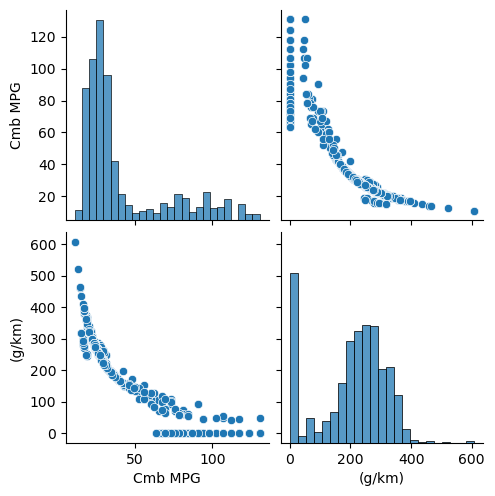

In [15]:
# Seeing the relationship between our quantitative features
sns.pairplot(df2)

In [16]:
hf.types

{'Veh Class': 'enum',
 '(L)': 'real',
 'Cyl': 'int',
 'Trans': 'enum',
 'Type': 'enum',
 'Cmb MPG': 'real',
 '(g/km)': 'int',
 'label': 'enum'}

In [17]:
hf.describe()

Rows:1000
Cols:8

,Veh Class,(L),Cyl,Trans,Type,Cmb MPG,(g/km),label
type,enum,real,int,enum,enum,real,int,enum
mins,,0.0,0.0,,,11.0,0.0,
mean,,2.5871000000000035,4.627000000000002,,,41.951600000000035,203.09900000000036,
maxs,,8.0,16.0,,,130.7,608.0,
sigma,,1.7061813047401044,2.7596170905555892,,,28.931257752042416,115.59954348289396,
zeros,,171,171,,,0,171,
missing,0,0,0,0,0,0,0,0
0,Mid-size,2.0,4.0,A8,Z,32.0,205.0,No
1,Mid-size,2.0,4.0,A8,Z,31.0,217.0,No
2,Mid-size,2.9,6.0,A8,Z,24.0,271.0,No


In [18]:
aml = H2OAutoML(max_models = 10, seed = 10, verbosity="info", nfolds=5)

In [19]:
aml.train(x = x, y = y, training_frame = train, validation_frame=valid)

AutoML progress: |
21:56:40.163: Project: AutoML_1_20230608_215640
21:56:40.164: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
21:56:40.164: Setting stopping tolerance adaptively based on the training frame: 0.03782347372361169
21:56:40.165: Build control seed: 10
21:56:40.165: training frame: Frame key: AutoML_1_20230608_215640_training_py_4_sid_80a6    cols: 8    rows: 699  chunks: 1    size: 12243  checksum: -104856042949270980
21:56:40.165: validation frame: Frame key: py_6_sid_80a6    cols: 8    rows: 151  chunks: 1    size: 7242  checksum: 6223813280189015956
21:56:40.165: leaderboard frame: NULL
21:56:40.165: blending frame: NULL
21:56:40.165: response column: label
21:56:40.165: fold column: null
21:56:40.165: weights column: null
21:56:40.177: AutoML: XGBoost is not av

key,value
Stacking strategy,cross_validation
Number of base models (used / total),2/5
# GBM base models (used / total),1/1
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
# DeepLearning base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [21]:
lb = aml.leaderboard

In [22]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20230608_215640,1,7.15109e-05,1,0,8.49798e-05,7.22156e-09
GBM_3_AutoML_1_20230608_215640,1,7.1912e-15,1,0,1.87989e-13,3.53399e-26
GBM_1_AutoML_1_20230608_215640,1,1.01041e-13,1,0,2.67002e-12,7.12899e-24
XRT_1_AutoML_1_20230608_215640,1,0.0273192,1,0,0.0372724,0.00138923
GBM_5_AutoML_1_20230608_215640,1,1.14991e-06,1,0,3.03358e-05,9.20258e-10
StackedEnsemble_AllModels_1_AutoML_1_20230608_215640,1,5.4074e-05,1,0,6.16574e-05,3.80164e-09
DRF_1_AutoML_1_20230608_215640,1,0.00279511,1,0,0.0199814,0.000399256
GBM_4_AutoML_1_20230608_215640,1,3.3671e-14,1,0,8.88788e-13,7.89945e-25
GBM_2_AutoML_1_20230608_215640,1,1.15001e-14,1,0,3.03497e-13,9.21103e-26
GBM_grid_1_AutoML_1_20230608_215640_model_1,1,6.18996e-05,1,0,0.0010966,1.20253e-06


In [23]:
pred=aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [24]:
pred.head()

predict,No,Yes
No,0.999965,3.45788e-05
No,0.999965,3.45788e-05
No,0.999965,3.45788e-05
No,0.999965,3.45788e-05
No,0.999965,3.45788e-05
No,0.999965,3.45788e-05
No,0.999965,3.45788e-05
No,0.999965,3.45788e-05
No,0.999965,3.45788e-05
No,0.999965,3.45788e-05


In [25]:
# Performance on test set
aml.leader.model_performance(test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 3.6668205345328646e-09
RMSE: 6.055427759071084e-05
LogLoss: 5.2679642053279813e-05
AUC: 1.0
AUCPR: 1.0
Gini: 1.0
Null degrees of freedom: 149
Residual degrees of freedom: 147
Null deviance: 177.97826630842746
Residual deviance: 0.01580389261598064
AIC: 6.01580389261598

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9998011588714857
       No    Yes    Error    Rate
-----  ----  -----  -------  -----------
No     108   0      0        (0.0/108.0)
Yes    0     42     0        (0.0/42.0)
Total  108   42     0        (0.0/150.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value      idx
---------------------------  -----------  ---------  -----
max f1                       0.999801     1          1
max f2                       0.999801     1          1
max f0point5                 0.999801     1          1
max accuracy                 0.999801     1          1
max precision                0.999904     1          0
max recall                   0.999801     1          1
max specificity              0.999904     1          0
max absolute_mcc             0.999801     1          1
max min_per_class_accuracy   0.999801     1          1
max mean_per_class_accuracy  0.999801     1          1
max tns                      0.999904     108        0
max fns                      0.999904     1          0
max fps                      3.45788e-05  108        3
max tps                      0.999801     42         1
max tnr                      0.999904     1          0
max fnr                      0.999904     0.0238095  0
max fpr                      3.45788e-05  1          3
max tpr                      0.999801     1          1

Gains/Lift Table: Avg response rate: 28.00 %, avg score: 28.00 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.273333                    0.999904           3.57143    3.57143            1                0.999904    1                           0.999904            0.97619         0.97619                    257.143   257.143            0.97619
2        1                           3.45788e-05        0.0327654  1                  0.00917431       0.00920701  0.28                        0.279998            0.0238095       1                          -96.7235  0                  0

In [26]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [27]:
model_ids

['StackedEnsemble_BestOfFamily_1_AutoML_1_20230608_215640',
 'GBM_3_AutoML_1_20230608_215640',
 'GBM_1_AutoML_1_20230608_215640',
 'XRT_1_AutoML_1_20230608_215640',
 'GBM_5_AutoML_1_20230608_215640',
 'StackedEnsemble_AllModels_1_AutoML_1_20230608_215640',
 'DRF_1_AutoML_1_20230608_215640',
 'GBM_4_AutoML_1_20230608_215640',
 'GBM_2_AutoML_1_20230608_215640',
 'GBM_grid_1_AutoML_1_20230608_215640_model_1',
 'GLM_1_AutoML_1_20230608_215640',
 'DeepLearning_1_AutoML_1_20230608_215640']

In [32]:
# Getting model details of specific models (copy+paste using model_ids from above)
out = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_BestOfFamily_1_AutoML_1_20230608_215640" in mid][0])

In [33]:
out

key,value
Stacking strategy,cross_validation
Number of base models (used / total),2/5
# GBM base models (used / total),1/1
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
# DeepLearning base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


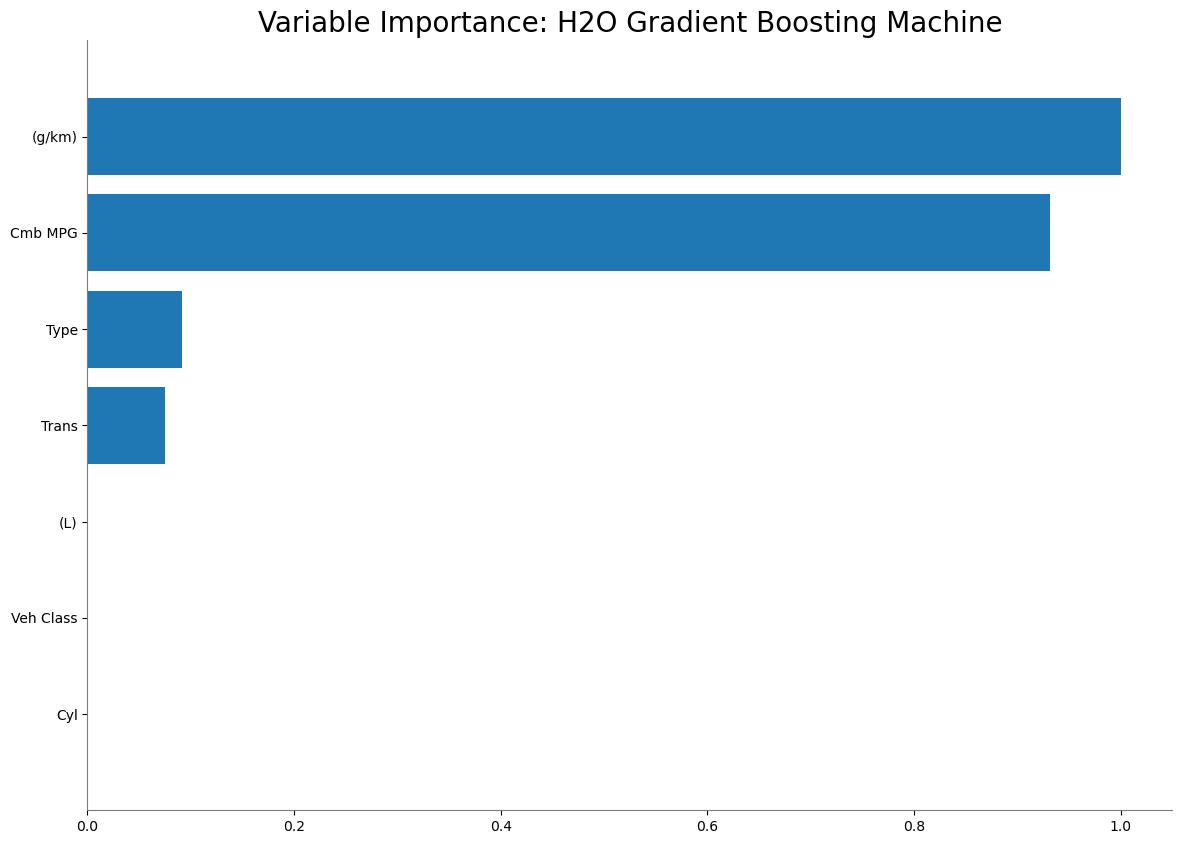

In [30]:
out.varimp_plot()

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_1_20230608_215640

,No,Yes,Error,Rate
No,108.0,0.0,0.0,(0.0/108.0)
Yes,0.0,42.0,0.0,(0.0/42.0)
Total,108.0,42.0,0.0,(0.0/150.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

<Figure size 640x480 with 0 Axes>

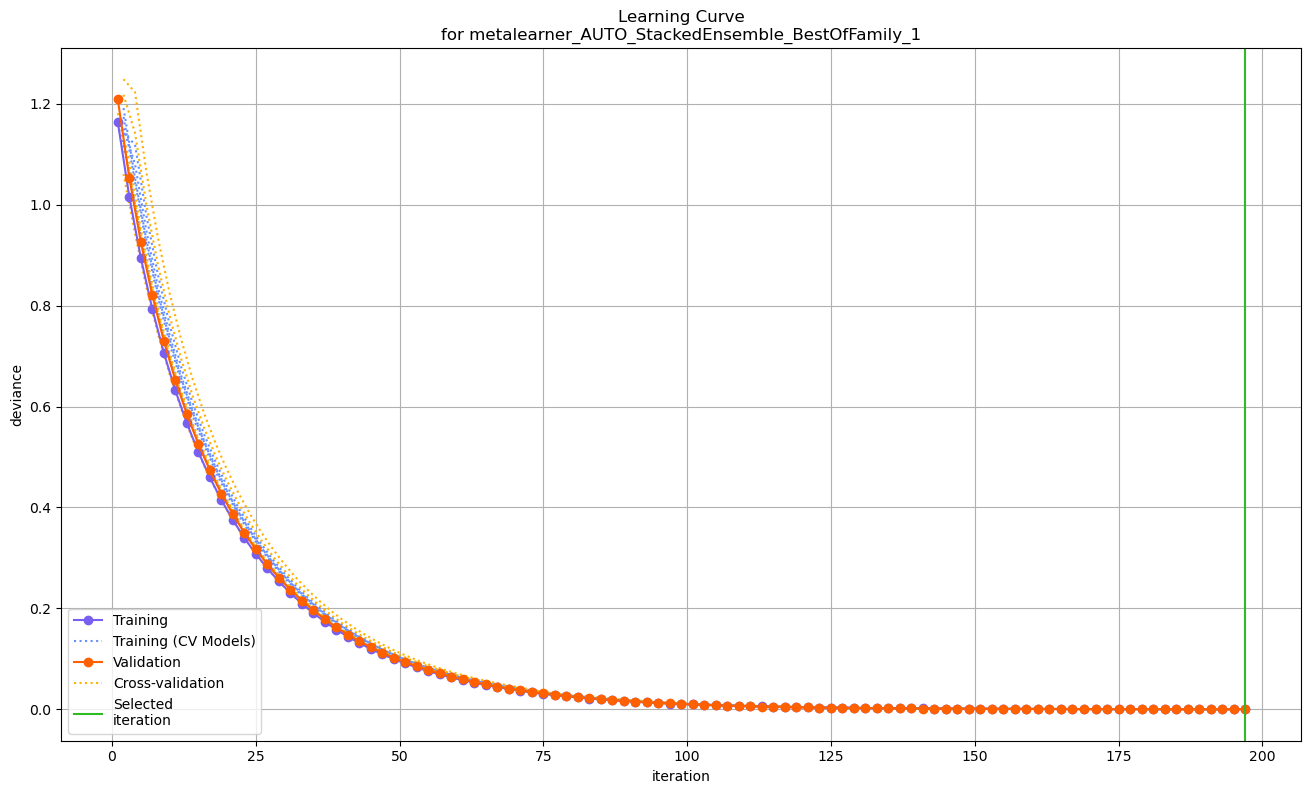

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

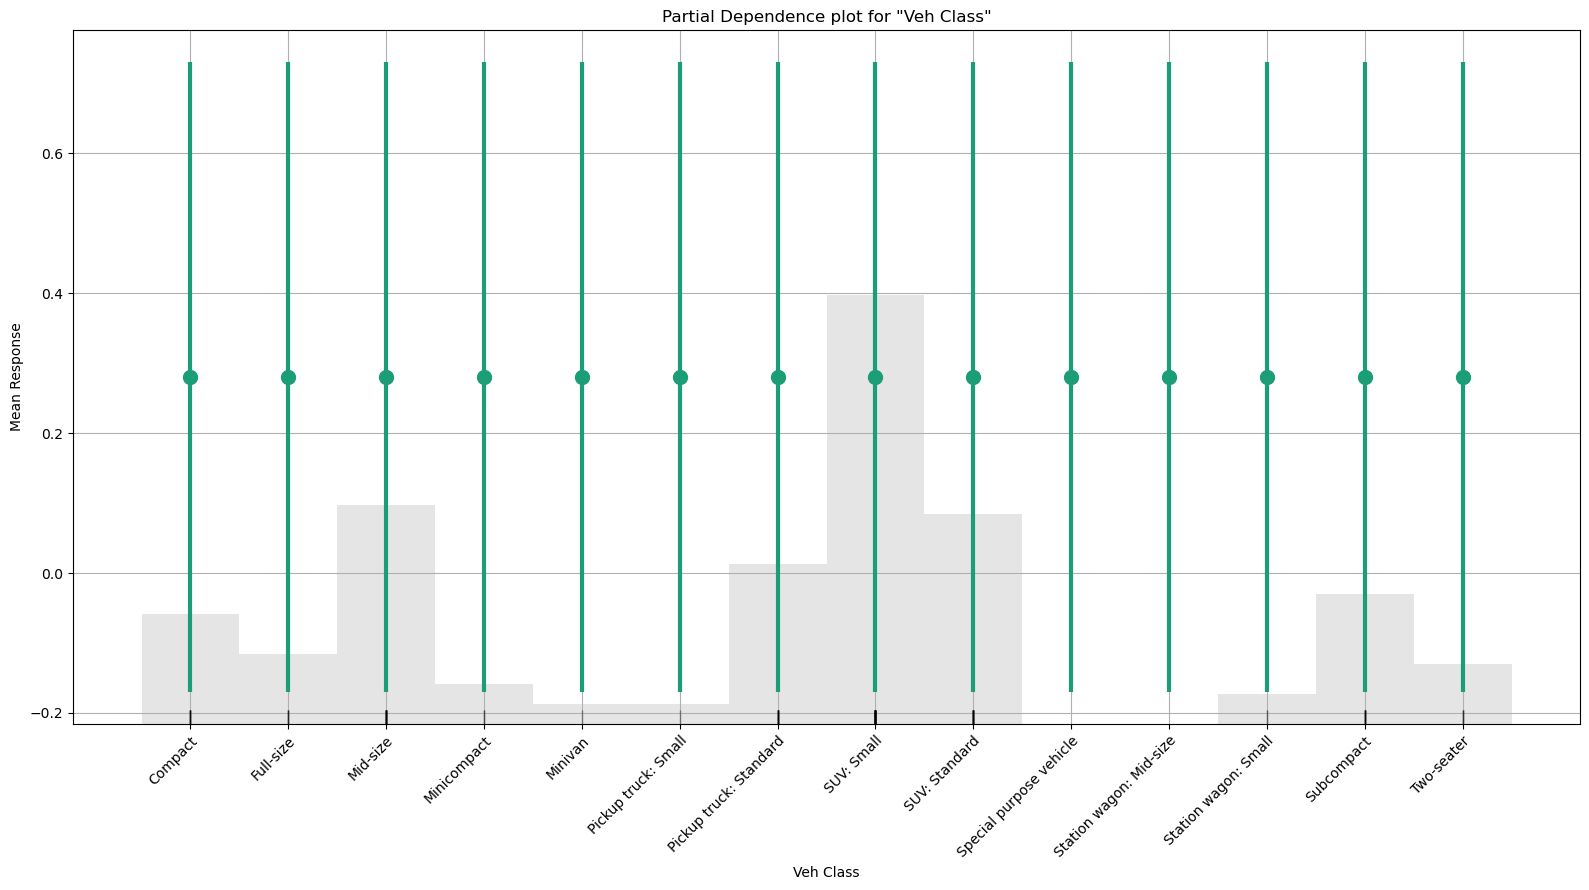

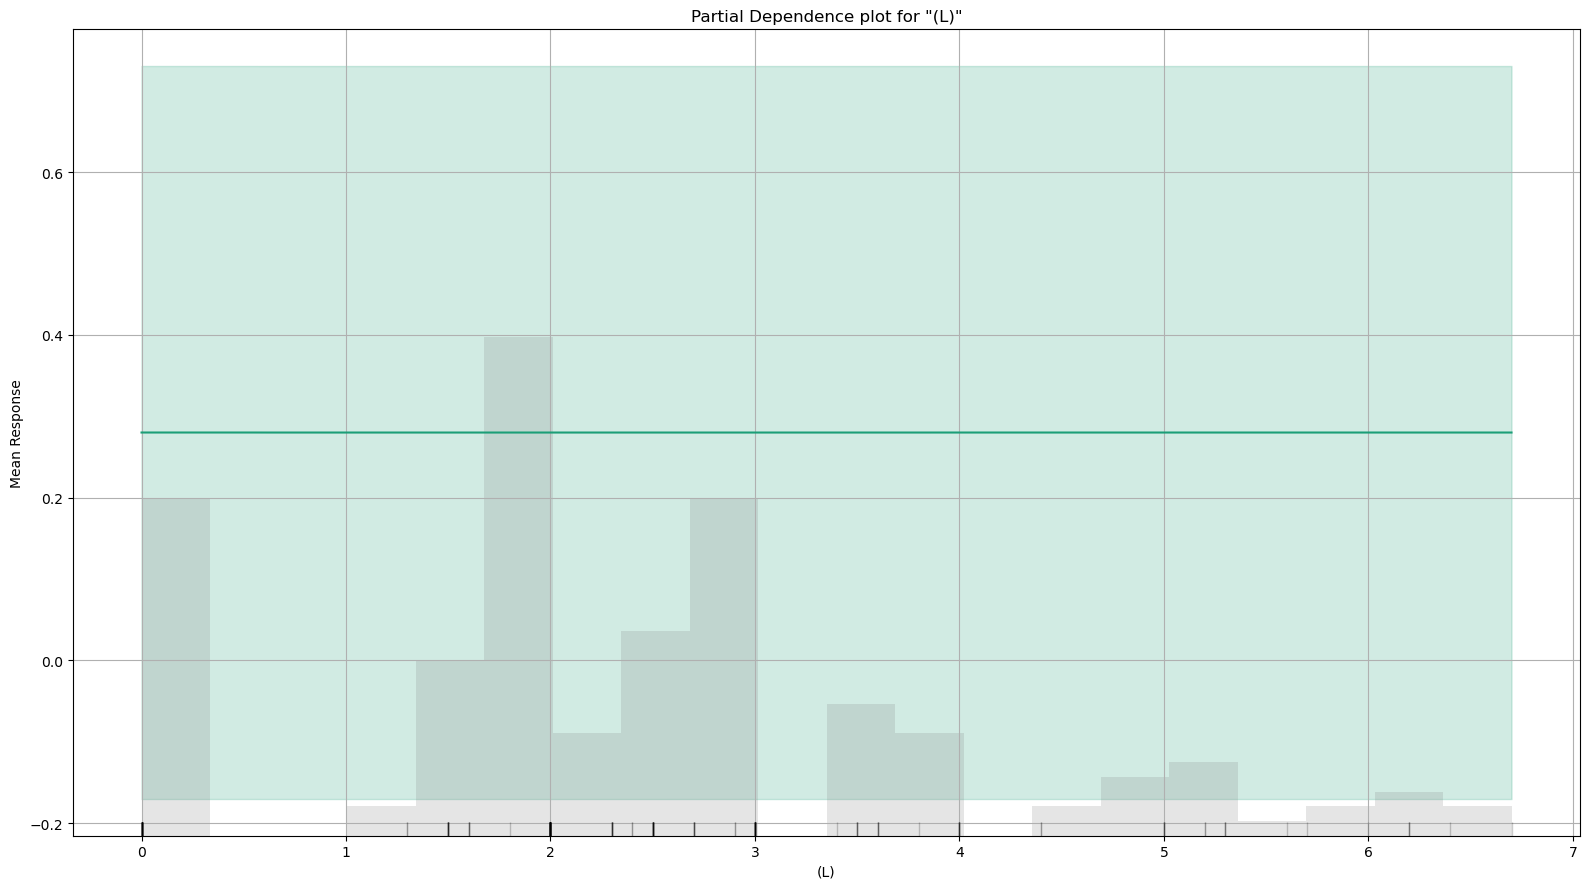

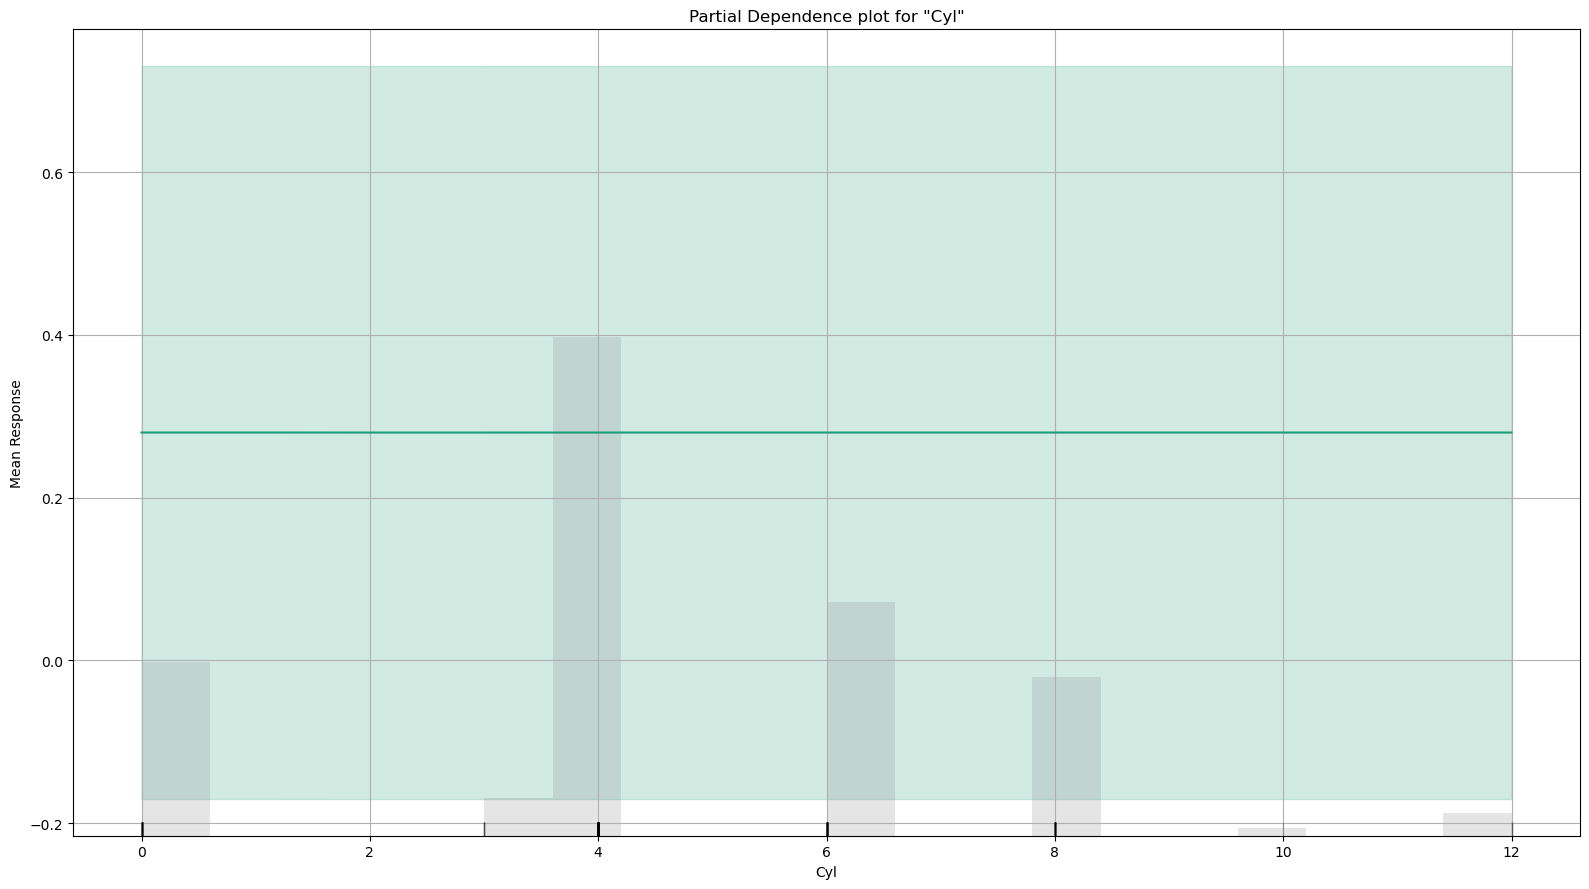

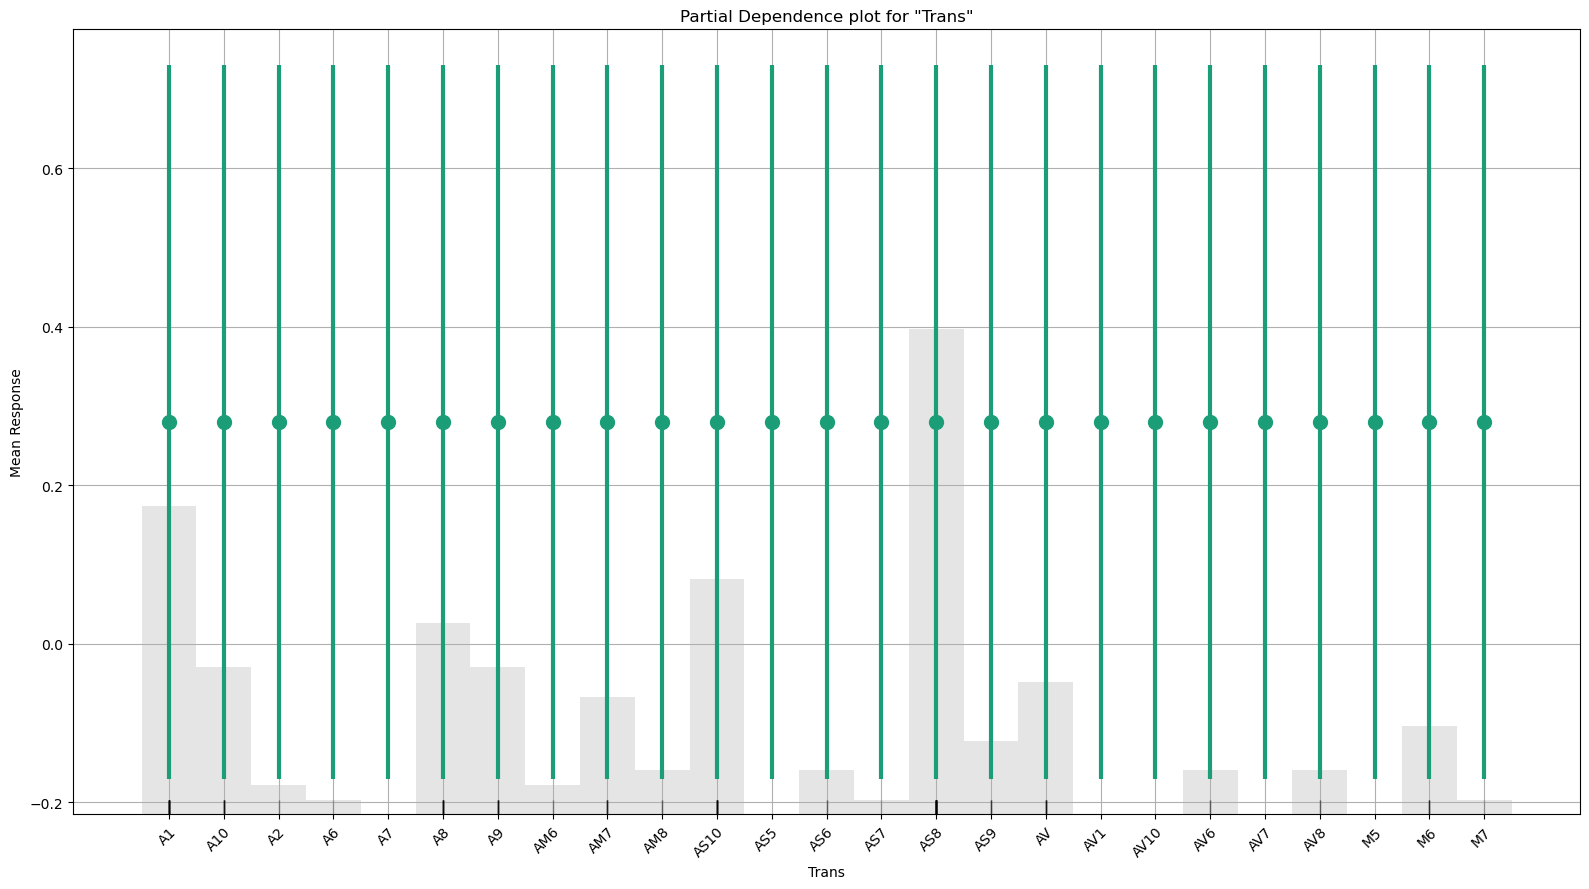

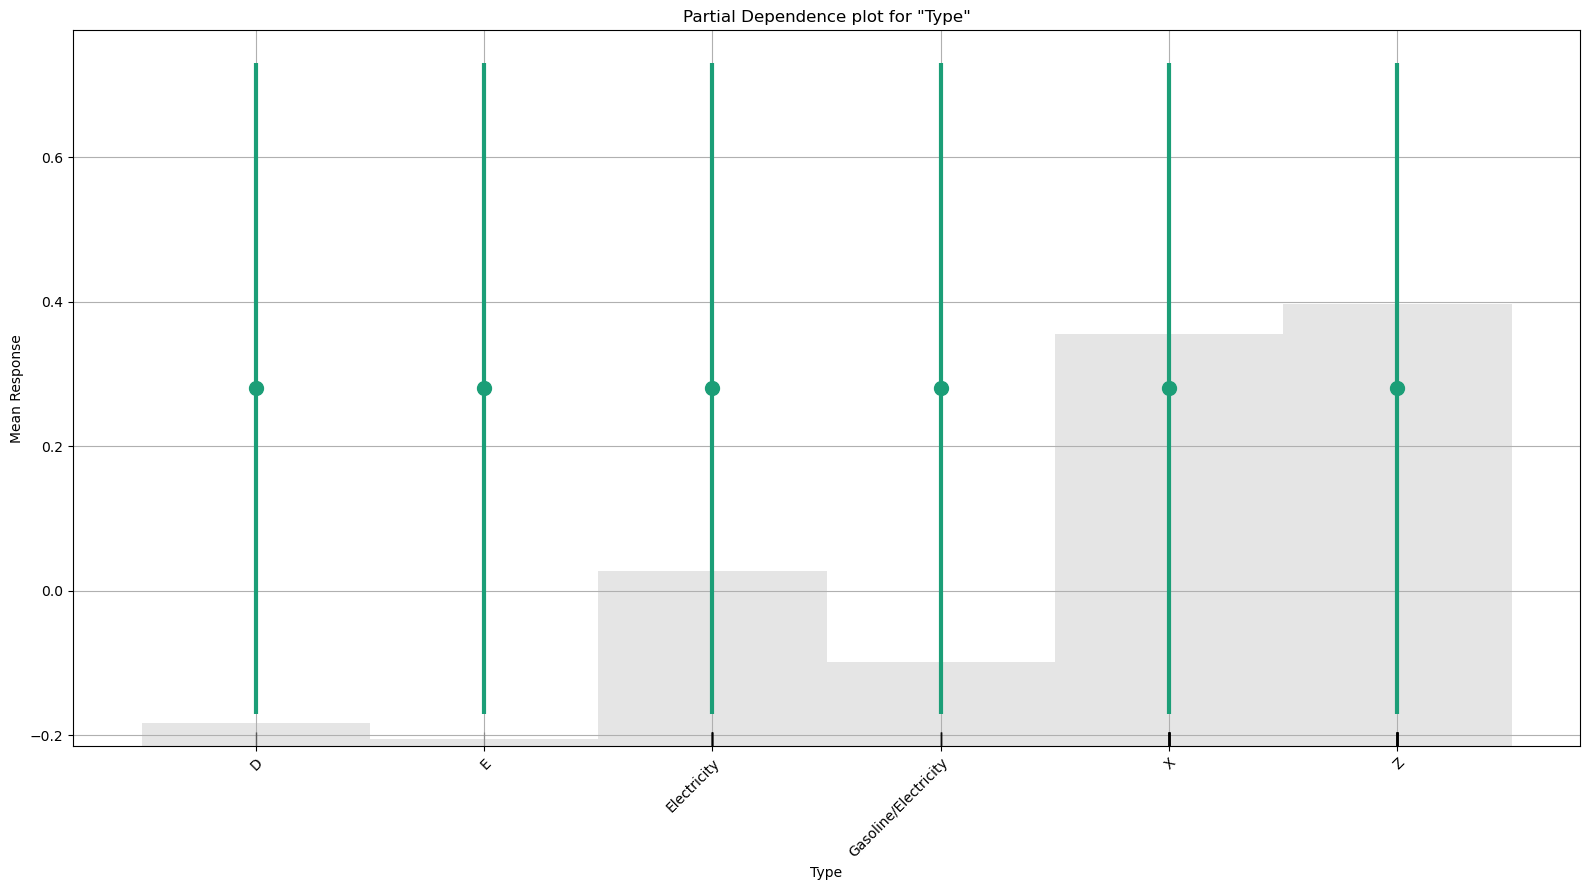

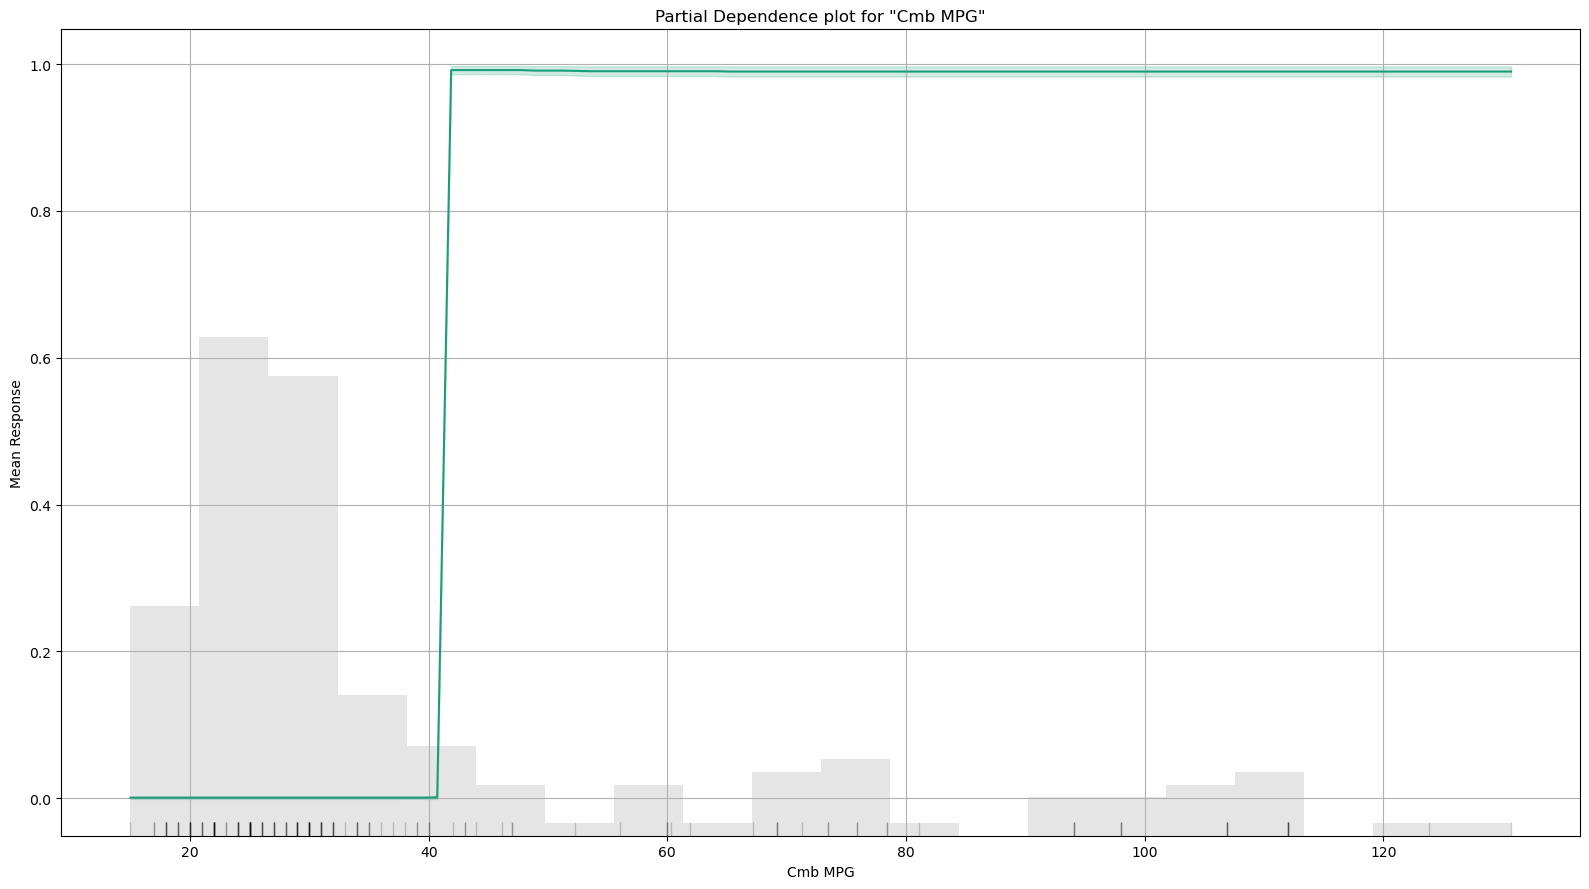

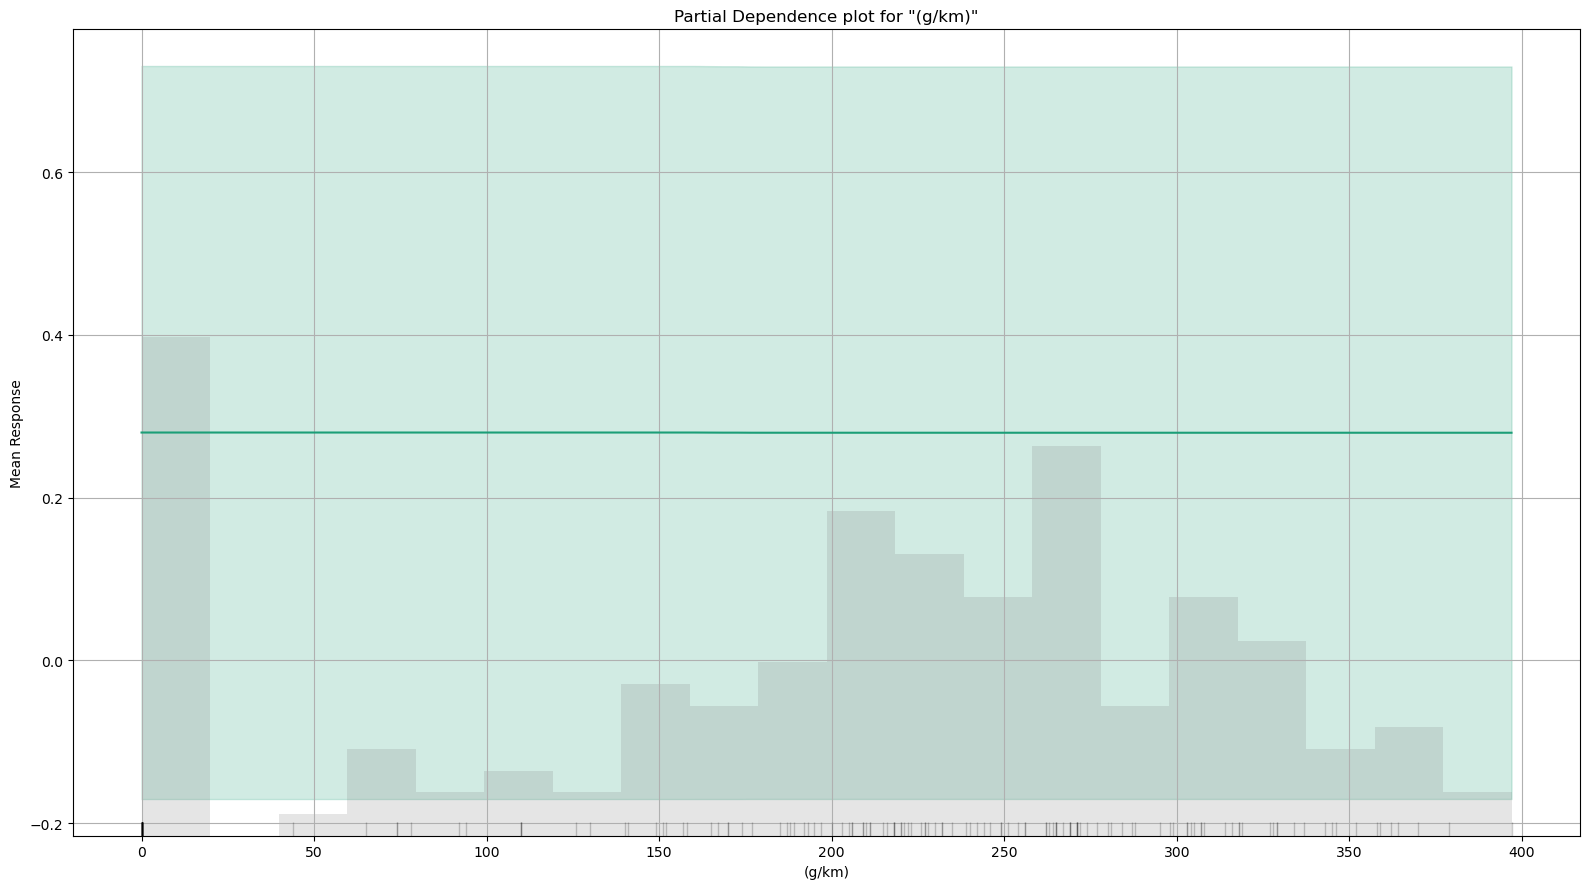

In [31]:
exm = aml.leader.explain(test)